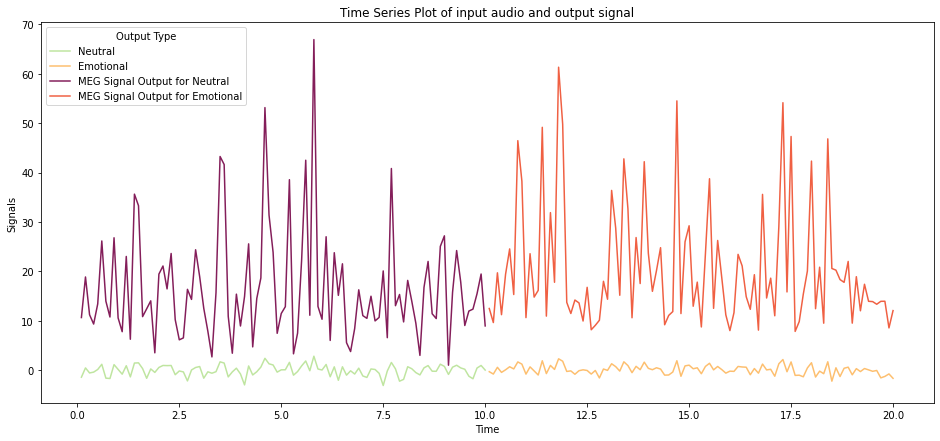

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

input = pd.read_csv('/content/drive/MyDrive/X.csv')
output = pd.read_csv('/content/drive/MyDrive/y.csv')
time = pd.read_csv('/content/drive/MyDrive/time.csv')


df = pd.concat([input, output, time], axis = 1)

# Task 1 (Time series plots (of input audio and output MEG signal)) 
df['Type'] = df['x2'].map({0 : 'Neutral ',
                                                                     1 : 'Emotional'})

df['Output Type'] = df['x2'].map({0 : 'MEG Signal Output for Neutral',
                                                                            1 : 'MEG Signal Output for Emotional'})


plt.figure(figsize = (16, 7))
sns.lineplot(x = 'time', y = 'x1', hue = 'Type', palette = 'Spectral_r', data = df)
sns.lineplot(x = 'time', y = 'y', hue = 'Output Type', palette = 'rocket', data = df)
plt.xlabel('Time')
plt.ylabel('Signals')
plt.title('Time Series Plot of input audio and output signal')
plt.show()



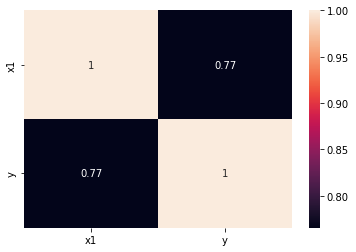

In [ ]:
# Distributions for the Input Signal
plt.figure(figsize = (16, 7))
sns.displot(x = 'x1', hue = 'Output Type',  color = 'r', kind = 'kde', data = df)

plt.xlabel('MEG Signal Input')
plt.title('Distribution Plot of MEG Output')
plt.show()

# Distributions for Output Signal
plt.figure(figsize = (16, 7))
sns.displot(x = 'y', hue = 'Output Type',  color = 'g', kind = 'kde', data = df)

plt.xlabel('MEG Signal Output')
plt.title('Distribution Plot of MEG Output')
plt.show()

# correlation plot between Input Audio signals and MEG Signal Outputs
sns.heatmap(df[['x1', 'y']].corr(), annot = True)

# scatter plot for Input Audio signals and MEG Signal Outputs
plt.figure(figsize = (16, 7))
sns.scatterplot(x = 'x1', y = 'y', hue = 'Type', data = df)
plt.xlabel('Input Audio')
plt.title('MEG Signal Output')
plt.show()

# Box plot for MEG Signal Outputs by input audio type
plt.figure(figsize = (20, 8))
sns.boxplot(x = 'Output Type', y = 'y', data = df,palette="rocket")
plt.xlabel('Signal Type')
plt.title('MEG Signal Output')
plt.show()



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Model 1 RSS: 11825.4213529512
Log-Likelihood for Model 1: -691.7579086795048
AIC for Model number one: 1391.5158173590096
BIC for Model number one: 1404.7090868252017


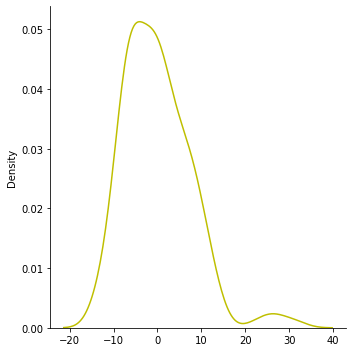

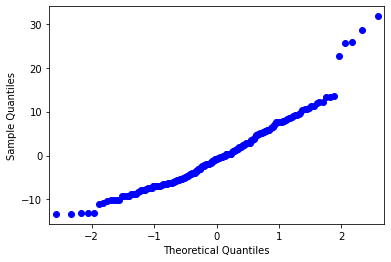

Model 2 RSS: 11238.94963854942
Log-Likelihood of the Model 2: -686.6712912238318
AIC for the Model 2: 1379.3425824476635
BIC for the Model 2: 1389.2375345473076


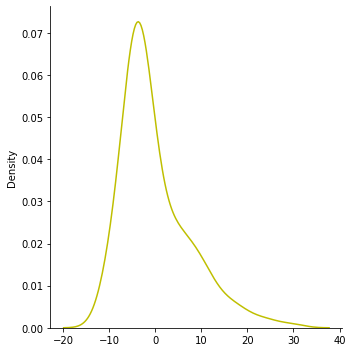

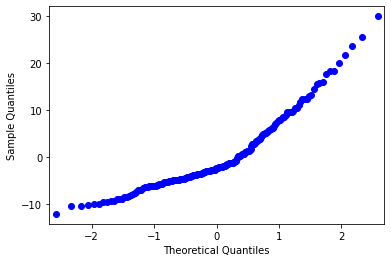

Model 3 RSS: 1636.1676067722408
Log-Likelihood for the Model number three: -493.9684202727279
AIC of the Model 3: 997.9368405454558
BIC of the Model 3: 1014.4284273781959


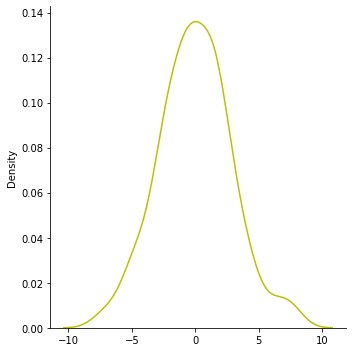

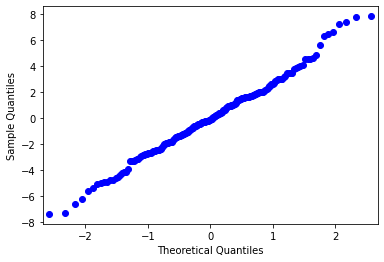

Model 4 RSS: 1902.0628559965817
Log-Likelihood of the Model 4: -509.0266531560953
AIC of the Model 4: 1030.0533063121907
BIC of the Model 4: 1049.8432105114787


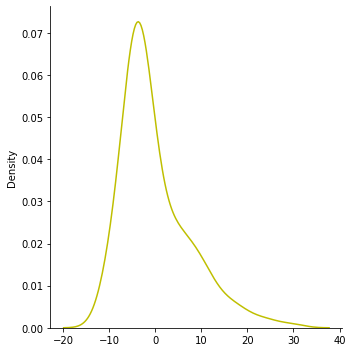

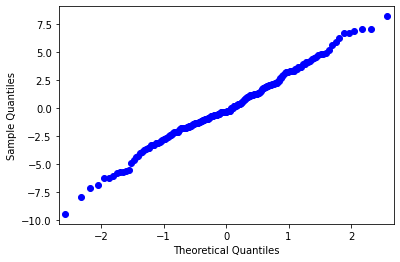

Model 5 RSS: 4928.31206100396
Log-Likelihood of the Model 5: -667.3346685557584
AIC of the Model 5: 1344.6693371115168
BIC of the Model 5: 1361.160923944257


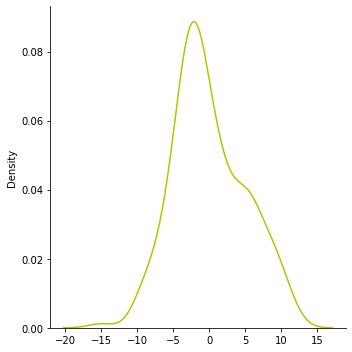

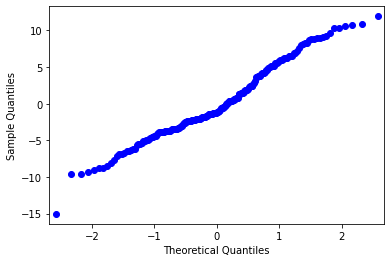

Confidence Interval for 95% Confidence on Model Predictions: [19.461507124933227, 20.95148515098633]


Text(0, 0.5, 'MEG Output (y)')

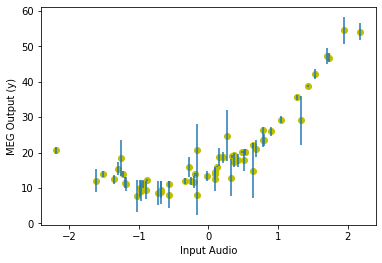

In [ ]:
import statsmodels.api as sm
# Task 2
y_in = pd.concat([input, output], axis = 1)

# Created the Model number 1
x1_3 = np.array(y_in['x1']**3).reshape(y_in.shape[0], 1)
x1_5 = np.array(y_in['x1']**5).reshape(y_in.shape[0], 1)
x2 = np.array(y_in['x2']).reshape(y_in.shape[0], 1)
bias = np.ones((y_in.shape[0], 1))
y = np.array(y_in['y']).reshape(y_in.shape[0], 1)

model1 = np.hstack((x1_3, x1_5, x2, bias))

# Task 2.1 is here
coeff = (np.linalg.inv(model1.T @ model1) @ model1.T @ y)
estimated_y1 = (model1 @ coeff)[:, 0]
y = y[:, 0]

# Task 2.2 model residual (error) sum of squared errors (RSS), for every candidate model.
rss = sum((y - estimated_y1)**2)
print('Model 1 RSS:', rss)

# Task 2.3 computing log likelihood function
var_res = rss/(y.shape[0] - 1)
n = model1.shape[0]
log_likelihood = ((-n/2) * np.log(2 * np.pi)) + ((-n/2) * np.log(var_res)) + ((-1/(2 * var_res)) * rss)
print('Log-Likelihood for Model 1:', log_likelihood)

# Task 2.4 AIC and BIC 
aic = (2 * (model1.shape[1])) - (2 * log_likelihood)
bic = (model1.shape[1]) * (np.log(n)) - (2 * log_likelihood)
print('AIC for Model number one:', aic)
print('BIC for Model number one:', bic)

# Task 2.5
residuals = (y - estimated_y1)
sns.displot(residuals, kind = 'kde',color="y")
plt.show()
sm.qqplot(residuals)
plt.show()

# Model 2

x1 = np.array(y_in['x1']).reshape(y_in.shape[0], 1)
x2 = np.array(y_in['x2']).reshape(y_in.shape[0], 1)
bias = np.ones((y_in.shape[0], 1))
y = np.array(y_in['y']).reshape(y_in.shape[0], 1)

model2 = np.hstack((x1, x2, bias))

# Task 2.1
coeff = (np.linalg.inv(model2.T @ model2) @ model2.T @ y)
estimated_y2 = (model2 @ coeff)[:, 0]
y = y[:, 0]

# Task 2.2
rss = sum((y - estimated_y2)**2)
print('Model 2 RSS:', rss)

# Task 2.3
var_res = rss/(y.shape[0] - 1)
n = model2.shape[0]
log_likelihood = ((-n/2) * np.log(2 * np.pi)) + ((-n/2) * np.log(var_res)) + ((-1/(2 * var_res)) * rss)
print('Log-Likelihood of the Model 2:', log_likelihood)

# Task 2.4
aic = (2 * (model2.shape[1])) - (2 * log_likelihood)
bic = (model2.shape[1]) * (np.log(n)) - (2 * log_likelihood)
print('AIC for the Model 2:', aic)
print('BIC for the Model 2:', bic)

# Task 2.5
residuals = (y - estimated_y2)
sns.displot(residuals, kind = 'kde',color="y")
plt.show()
sm.qqplot(residuals)
plt.show()

# Model 3
x1 = np.array(y_in['x1']).reshape(y_in.shape[0], 1)
x1_2 = np.array(y_in['x1']**2).reshape(y_in.shape[0], 1)
x1_4 = np.array(y_in['x1']**4).reshape(y_in.shape[0], 1)
x2 = np.array(y_in['x2']).reshape(y_in.shape[0], 1)
bias = np.ones((y_in.shape[0], 1))
y = np.array(y_in['y']).reshape(y_in.shape[0], 1)

model3 = np.hstack((x1, x1_2, x1_4, x2, bias))

# Task 2.1
coeff = (np.linalg.inv(model3.T @ model3) @ model3.T @ y)
estimated_y3 = (model3 @ coeff)[:, 0]
y = y[:, 0]

# Task 2.2
rss = sum((y - estimated_y3)**2)
print('Model 3 RSS:', rss)

# Task 2.3
var_res = rss/(y.shape[0] - 1)
n = model3.shape[0]
log_likelihood = ((-n/2) * np.log(2 * np.pi)) + ((-n/2) * np.log(var_res)) + ((-1/(2 * var_res)) * rss)
print('Log-Likelihood for the Model number three:', log_likelihood)


# Task 2.4
aic = (2 * (model3.shape[1])) - (2 * log_likelihood)
bic = (model3.shape[1]) * (np.log(n)) - (2 * log_likelihood)
print('AIC of the Model 3:', aic)
print('BIC of the Model 3:', bic)

# Task 2.5
res = (y - estimated_y3)
sns.displot(res, kind = 'kde',color="y")
plt.show()
sm.qqplot(res)
plt.show()

# Model 4
x1 = np.array(y_in['x1']).reshape(y_in.shape[0], 1)
x1_2 = np.array(y_in['x1']**2).reshape(y_in.shape[0], 1)
x1_3 = np.array(y_in['x1']**3).reshape(y_in.shape[0], 1)
x1_5 = np.array(y_in['x1']**5).reshape(y_in.shape[0], 1)
x2 = np.array(y_in['x2']).reshape(y_in.shape[0], 1)
bias = np.ones((y_in.shape[0], 1))
y = np.array(y_in['y']).reshape(y_in.shape[0], 1)

model4 = np.hstack((x1, x1_2, x1_3, x1_5, x2, bias))


# Task 2.1
coeff = (np.linalg.inv(model4.T @ model4) @ model4.T @ y)
estimated_y4 = (model4 @ coeff)[:, 0]
y = y[:, 0]

# Task 2.2
rss = sum((y - estimated_y4)**2)
print('Model 4 RSS:', rss)

# Task 2.3
var_res = rss/(y.shape[0] - 1)
n = model4.shape[0]
log_likelihood = ((-n/2) * np.log(2 * np.pi)) + ((-n/2) * np.log(var_res)) + ((-1/(2 * var_res)) * rss)
print('Log-Likelihood of the Model 4:', log_likelihood)

# Task 2.4
aic = (2 * (model4.shape[1])) - (2 * log_likelihood)
bic = (model4.shape[1]) * (np.log(n)) - (2 * log_likelihood)
print('AIC of the Model 4:', aic)
print('BIC of the Model 4:', bic)

# Task 2.5
res = (y - estimated_y4)
sns.displot(residuals, kind = 'kde',color="y")
plt.show()
sm.qqplot(res)
plt.show()

# Model 5
x1 = np.array(y_in['x1']).reshape(y_in.shape[0], 1)
x1_3 = np.array(y_in['x1']**3).reshape(y_in.shape[0], 1)
x1_4 = np.array(y_in['x1']**4).reshape(y_in.shape[0], 1)
x2 = np.array(y_in['x2']).reshape(y_in.shape[0], 1)
bias = np.ones((y_in.shape[0], 1))
y = np.array(y_in['y']).reshape(y_in.shape[0], 1)

model5 = np.hstack((x1, x1_3, x1_4, x2, bias))

# Task 2.1
coeff = (np.linalg.inv(model5.T @ model5) @ model5.T @ y)
estimated_y5 = (model5 @ coeff)[:, 0]
y = y[:, 0]

# Task 2.2
rss = sum((y - estimated_y5)**2)
print('Model 5 RSS:', rss)

# Task 2.3
residuals = rss/(y.shape[0] - 1)
n = model5.shape[0]
log_likelihood = ((-n/2) * np.log(2 * np.pi)) + ((-n/2) * np.log(var_res)) + ((-1/(2 * var_res)) * rss)
print('Log-Likelihood of the Model 5:', log_likelihood)

# Task 2.4
aic = (2 * (model5.shape[1])) - (2 * log_likelihood)
bic = (model5.shape[1]) * (np.log(n)) - (2 * log_likelihood)
print('AIC of the Model 5:', aic)
print('BIC of the Model 5:', bic)

# Task 2.5
res = (y - estimated_y5)
sns.displot(res, kind = 'kde',color="y")
plt.show()
sm.qqplot(res)
plt.show()

# Task 2.7
training_set = y_in.iloc[:int(0.7 * y_in.shape[0]), :]
test_set = y_in.iloc[int(0.7 * y_in.shape[0]):, :]

x1 = np.array(training_set['x1']).reshape(training_set.shape[0], 1)
x1_2 = np.array(training_set['x1']**2).reshape(training_set.shape[0], 1)
x1_4 = np.array(training_set['x1']**4).reshape(training_set.shape[0], 1)
x2 = np.array(training_set['x2']).reshape(training_set.shape[0], 1)
bias = np.ones((training_set.shape[0], 1))
y = np.array(training_set['y']).reshape(training_set.shape[0], 1)

model3 = np.hstack((x1, x1_2, x1_4, x2, bias))

# parameter estimation
coeff = (np.linalg.inv(model3.T @ model3) @ model3.T @ y)
# output prediction on Test_Set
x1 = np.array(test_set['x1']).reshape(test_set.shape[0], 1)
x1_2 = np.array(test_set['x1']**2).reshape(test_set.shape[0], 1)
x1_4 = np.array(test_set['x1']**4).reshape(test_set.shape[0], 1)
x2 = np.array(test_set['x2']).reshape(test_set.shape[0], 1)
bias = np.ones((test_set.shape[0], 1))
y = np.array(test_set['y']).reshape(test_set.shape[0], 1)
test = np.hstack((x1, x1_2, x1_4, x2, bias))
estimated_y3 = (test @ coeff)[:, 0]

y_test = np.array(test_set['y']).reshape(test_set.shape[0], 1)
y_test = y_test[:, 0]

# Task 2.7

# 3) confidence intervals of model predictions at 95% confidence
mean_model_pred = np.mean(estimated_y3)
rss = sum((y_test - estimated_y3)**2)
stdev_resi = np.sqrt(rss/(y_test.shape[0] - 1))

# the z-score for 95% confidence interval is 1.96
ci_lowerbound = mean_model_pred - (1.96 * stdev_resi)/(np.sqrt(y_test.shape[0]))
ci_upperbound = mean_model_pred + (1.96 * stdev_resi)/(np.sqrt(y_test.shape[0]))
print('Confidence Interval for 95% Confidence on Model Predictions:', [ci_lowerbound, ci_upperbound])


yerror = abs(y_test - estimated_y3)
plt.scatter(x1[:, 0], y_test,color="y")
plt.errorbar(x1[:, 0], y_test, yerr=yerror, linestyle="None")
plt.xlabel('Input Audio')
plt.ylabel('MEG Output (y)')